# Introduction

This goal of this project is to analyse choclate sales data uploaded to Kaggle (https://www.kaggle.com/datasets/atharvasoundankar/chocolate-sales/data). I love chocolate and after Breakaway being discontinued and Yorkie biscuit having the same fate, I want to see what the next victim could be (I am not talking about myself). 

<h2> Collection Methodology</h2>
Data was aggregated from chocolate retailers and online marketplaces.
Only confirmed transactions were included to ensure accuracy.
Revenue values reflect final prices after applying discounts, if any.

This project will scope, analyse, prepare, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:

- What purchasing patterns are evident across different customer segments?
- Do certain types of chocolate categories perform best in different locations?
- What potential marketing strategies can be employed based on data insights, how valuale is chocolate?

**Data sources:**
 `ChocolateSales.csv` 


## Scoping

It's beneficial to create a project scope. The 4 sections were created below to help guide the project's process and progress. The first section is the project goals, this section will define the high-level objectives and set the intentions for this project. The next section is the data, it needs to be checked if project goals can be met with the available data. Thirdly, the analysis will have to be thought through, which includes the methods and questions that are aligned with the project goals. Lastly, evaluation will help us build conclusions and findings from our analysis.

### Project Goals

In this project the perspective will be through a chocloate lover who wants to gain an insight into chocolate sales across the globe, trends in types of chocolates being purchased and how valuable the sweet treat is. 

- What purchasing patterns are evident across different customer segments?
- Do certain types of chocolate categories perform best in different locations?
- What potential marketing strategies can be employed based on data insights, how valuale is chocolate?

### Data

This project has one data set as a `csv` file. This dataset contains detailed records of chocolate sales, including product details, sales quantities, revenue, and customer segments. 

### Analysis

In this section, descriptive statistics and data visualisation techniques will be employed to understand the data better. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include: 

1. Distributions
1. Counts
1. Relationship between location and sales
1. Customer behaviour analysis
1. Seasonality trends 

### Evaluation

Lastly, I will revisit the goals and check if the output of the analysis corresponds to the questions first set to be answered (in the goals section). This section will also reflect on what has been learned through the process, and if any of the questions were unable to be answered. This will also include limitations or if any of the analysis could have been done using different methodologies.

## Import Python Modules

In [32]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

## Loading in the data

In [33]:
salesData = pd.read_csv("/Users/jai/Documents/GitHub/EDARepo/ChocolateEDA/ChocolateSales.csv")
salesData.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


The <code>ChocolateSales.csv</code> information on chocolate sales across the globe. The columns in the dataset are:
<ul>
<li>Sales Person - the sales person who sold the product</li> 
<li>Country - Sales region or store location where the transaction took place</li>
<li>Product - Name of the chocolate product sold</li>
<li>Date - The transaction date of the chocolate sale</li>
<li>Amount - Total revenue generated from the sale</li>
<li>Boxes Shipped - Number of chocolate units sold in the transaction</li>
</ul>

<h2>Data characteristics</h2>

In [34]:
salesData.shape

(1094, 6)

In [35]:
salesData.dtypes

Sales Person     object
Country          object
Product          object
Date             object
Amount           object
Boxes Shipped     int64
dtype: object

In [36]:
salesData.isna().sum()

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

We have no missing data. Amount needs to be converted to a flaot first and foremost to enable descriptive analysis on the column later down the line.

In [37]:
salesData["Amount"] = salesData["Amount"].astype(str)
salesData["Amount"] = salesData["Amount"].str.replace("," , "")
salesData["Amount"] = salesData["Amount"].str.replace(r"\$", "", regex=True).astype(float)

In [38]:
salesData.dtypes

Sales Person      object
Country           object
Product           object
Date              object
Amount           float64
Boxes Shipped      int64
dtype: object

<h2>Explore the data</h2>

Find the number of distinct enterties for each column in the data. The dataset includes data for 385 boxes of chocolates sold across 6 countries. 

In [39]:
print(f"Number of distinct enteries in each columns:{salesData.nunique()}")

Number of distinct enteries in each columns:Sales Person      25
Country            6
Product           22
Date             168
Amount           827
Boxes Shipped    385
dtype: int64


Taking a look into the types of <code>Product</code> sold. The most popular products sold are the 50% Dark Bites and the Eclairs. The least popular product sold is the Choco Coated Almonds (perfect as I am allergic anyway). 

In [40]:
salesData.groupby("Product").size().sort_values()

Product
Choco Coated Almonds    39
Baker's Choco Chips     41
70% Dark Bites          42
Caramel Stuffed Bars    43
Mint Chip Choco         45
Manuka Honey Choco      45
Orange Choco            47
Almond Choco            48
Raspberry Choco         48
Milk Bars               49
Peanut Butter Cubes     49
99% Dark & Pure         49
Fruit & Nut Bars        50
After Nines             50
85% Dark Bars           50
Organic Choco Syrup     52
Spicy Special Slims     54
Drinking Coco           56
White Choc              58
Smooth Sliky Salty      59
50% Dark Bites          60
Eclairs                 60
dtype: int64

Next I want to see what country made the most purchases. This has 6 categories and the countries included in the dataset are:
<ul>
<li>Australia</li>
<li>Canada</li>
<li>India</li>
<li>New Zealand</li>
<li>UK</li>
<li>USA</li>
</ul>

Australia (205) placed the most orders for chocolate and New Zealand the least (173).

In [41]:
salesData.groupby("Country").size().sort_values()

Country
New Zealand    173
Canada         175
UK             178
USA            179
India          184
Australia      205
dtype: int64

Taking a look into the <code>Amount</code> of each order we can see the mean value of an order is $5652.31 with a large standard deviation of $4102.44 suggesting there is much variation in the order amount. This is likely because the Mean is skewed by the maximum value of $22050 and a mininimum order value of just $7.00. The median value is $4868.50 and should be taken as a more accurate central measure due to the presence of potential skewness.

In [42]:
salesData["Amount"].describe()

count     1094.000000
mean      5652.308044
std       4102.442014
min          7.000000
25%       2390.500000
50%       4868.500000
75%       8027.250000
max      22050.000000
Name: Amount, dtype: float64

Taking a look at the <code>Boxes Shipped</code> column we observe the mean number of boxes shipped is 161.8 with a standard deviation of 121.5, again a result with much variation suggesting the data is skewed. Consider the median of 135 boxes shipped in this case.

In [43]:
salesData["Boxes Shipped"].describe()

count    1094.000000
mean      161.797989
std       121.544145
min         1.000000
25%        70.000000
50%       135.000000
75%       228.750000
max       709.000000
Name: Boxes Shipped, dtype: float64

<h1>Analysis</h1>

This section will begin to analyse the data following the initial exploration. This dataset is small, with no missing values so minimal cleaning of the data is required.

First consider the distribution of chocolate sold by country, revenue amount and product. 

<h3>Sales distribution by country</h3> 

The bar chart suggests the number of sales by region are fairly evenly distributed, Australia the selling the most. I personally was not expecting this based on contextual knowledge. I was expecting countries such as India to sell more since their population is significantly larger than the other countries in the dataset.

Text(0.5, 1.0, 'Sales Distribution by Country')

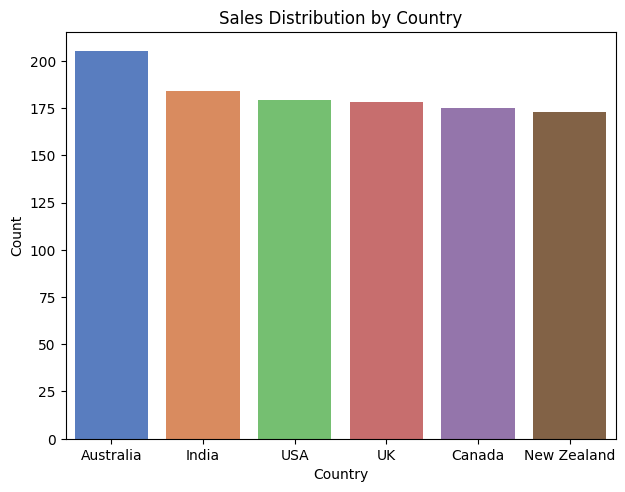

In [44]:
sns.countplot(data=salesData, x=salesData["Country"], order=salesData["Country"].value_counts().index, palette="muted")
plt.ylabel("Count")
plt.tight_layout()
plt.title("Sales Distribution by Country")

<h3>Distribution of revenue amount</h3>
 We can see the revenue amount is skewed to the left, with much fewer orders totalling more than $10,000 compared to the rest of the dataset. This is further seen in the boxplot where we have many outliers. This confirms the mean not being the best central measure for our data.


Building on this, I want to visualise the sales by country. Most countries seem to have sales amount fairly consistent with eachother and the sizes/lengths of their boxp are slightly varied, especially in the case of Australia. This suggests the interquartile range is different across the countries in the dataset. 

Australia clearly has the most outliers - this could be due to the cost of shipping inflating prices. 

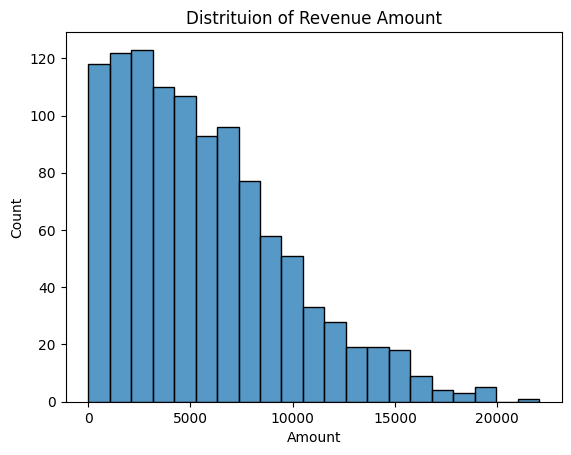

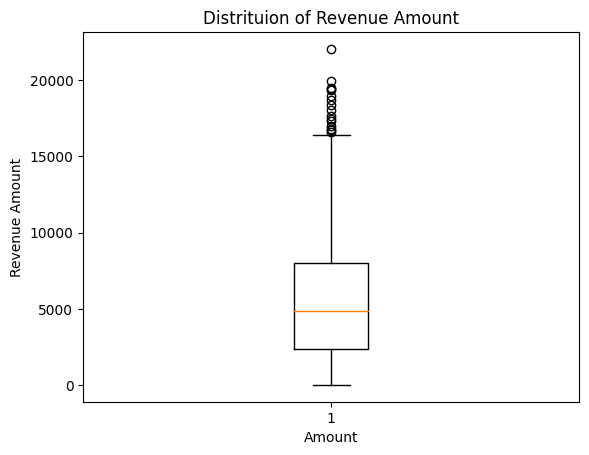

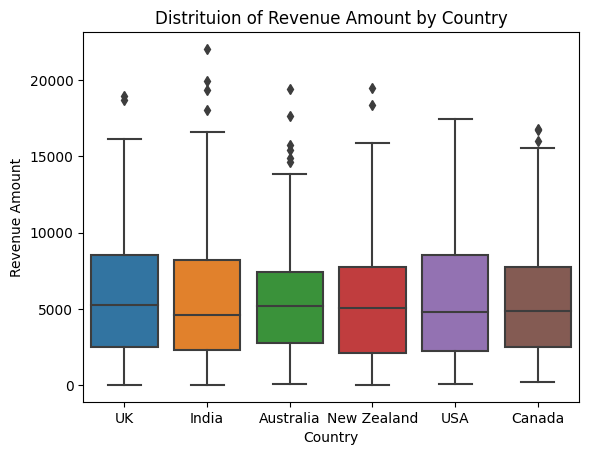

In [45]:
sns.histplot(salesData["Amount"])
plt.title("Distrituion of Revenue Amount")
plt.show()
plt.clf()

plt.boxplot(salesData["Amount"])
plt.title("Distrituion of Revenue Amount")
plt.ylabel("Revenue Amount")
plt.xlabel("Amount")
plt.show()


sns.boxplot(x=salesData["Country"], y=salesData["Amount"])
plt.title("Distrituion of Revenue Amount by Country")
plt.ylabel("Revenue Amount")
plt.xlabel("Country")
plt.show()


<h3>Visualising chocolate sales globally</h3>

In [46]:
# Aggregate Sales by Country
countrySales_df = salesData.groupby("Country")["Amount"].sum().reset_index()

# Create the choropleth map.
fig = px.choropleth(
    countrySales_df,
    locations="Country",           
    locationmode="country names", 
    color="Amount",                
    color_continuous_scale="Viridis",
    title="Total Sales by Country"
)

fig.show()

<h3>Distribution of the products sold</h3> 

This will provide us with an insight into the most and least popular chocolate products. Suprisingly, <code>99% Dark & Pure</code> is not the least popular despite it being a niche flavour profile. Since dark chocolate is considered a more healthy option this could potentially be a reason for this.

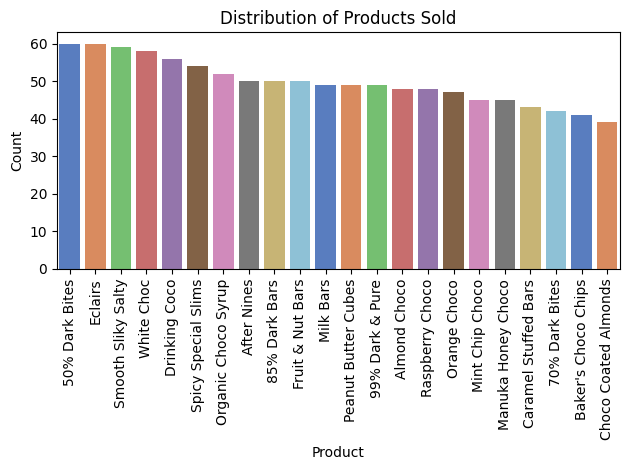

In [47]:
sns.countplot(data=salesData, x="Product", order=salesData["Product"].value_counts().index, palette="muted")
plt.xticks(rotation=90)
plt.title("Distribution of Products Sold")
plt.xlabel("Product")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

<h3>Visualising the products sold globally</h3>

The below visualisation gives an insight into the most popular chocolates sold in each country. This data can be used to inform decisions about the amount of stock required in each region as an example. 

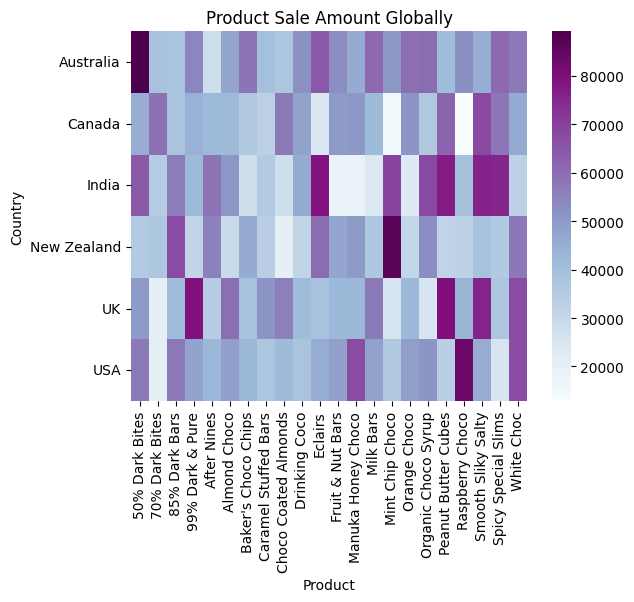

In [48]:
# Aggregate Products by Country
productsByCountry_df = salesData.pivot_table(index='Country', columns='Product', values='Amount', aggfunc='sum', fill_value=0)

sns.heatmap(productsByCountry_df, annot=False, cmap="BuPu", fmt=".2f")
plt.title("Product Sale Amount Globally")
plt.show()

<h3>Visualising the amount of chocolate sold over time</h3>

There is not enough data to identify any seasonality trends.

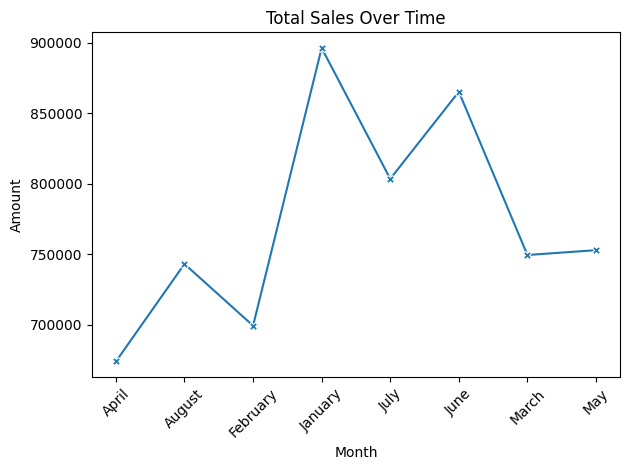

In [49]:
# Plotting Amount sold over a period of time 
# Convert 'Date' Column to datetime format and I am only interested in the month
salesData["Date"] = pd.to_datetime(salesData["Date"])
salesData["MonthName"] = salesData["Date"].dt.month_name()

monthly_sales = salesData.groupby(["MonthName"])["Amount"].sum().reset_index()
monthly_sales = monthly_sales.sort_values("MonthName")

sns.lineplot(data=monthly_sales, x="MonthName", y="Amount", marker="X")
plt.xticks(rotation=45)
plt.title("Total Sales Over Time")
plt.ylabel("Amount")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

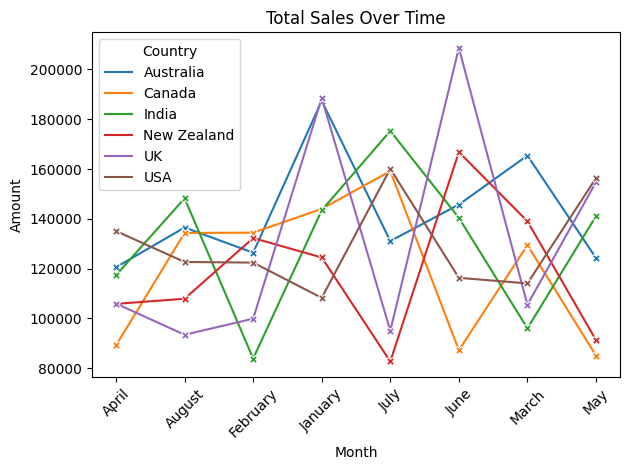

In [51]:
monthly_sales = salesData.groupby(["MonthName","Country"])["Amount"].sum().reset_index()
monthly_sales = monthly_sales.sort_values("MonthName")
sns.lineplot(data=monthly_sales, x="MonthName", y="Amount", marker="X", hue="Country")
plt.xticks(rotation=45)
plt.title("Total Sales Over Time")
plt.ylabel("Amount")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

<h3>Conclusion</h3>


<h3>Next Steps</h3>

Conduct forecasting based on the time series data. I have decided to omit it in this case since I don't not have much data.